In [2]:
%autosave 60

Autosaving every 60 seconds


In [3]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb
%run init-optical_elements.ipynb

In [4]:
from qiskit.quantum_info import entropy, DensityMatrix

In [5]:
%run init-qiskit.ipynb

C:\Users\stark\AppData\Local\Temp\ipykernel_17508\1918398002.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
ibmqfactory.load_account:WARNING:2023-06-14 06:41:22,002: Credentials are already in use. The existing account in the session will be replaced.


ibm_perth                    ibm_nairobi                  ibm_lagos
---------                    -----------                  ---------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 150            Pending Jobs: 63             Pending Jobs: 151
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      159.2          Avg. T1:      101.9          Avg. T1:      125.5
Avg. T2:      121.9          Avg. T2:      57.9           Avg. T2:      62.4



ibmq_manila                  ibmq_jakarta                 ibmq_quito
-----------                  ------------                 ----------
Num. Qubits:  5              Num. Qubits:  7              Num. Qubits:  5
Pending Jobs: 35             Pending Jobs: 171            Pending Jobs: 98
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operati

In [6]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [7]:
%run init-qiskit_optical_elements.ipynb

In [8]:
device = provider.get_backend('ibm_nairobi')

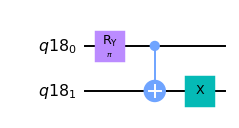

In [9]:
# Estado parcialmente emaranhado   ----->    a|01> + b|10> = cos(t/2)|01> + sin(t/2)|10>
def qc_BBO_p(th):
    qr = qiskit.QuantumRegister(2); qc = qiskit.QuantumCircuit(qr, name='BBO')
    qc.ry(th,qr[0]) # = qc.u(th,0,0,qr[0])
    qc.cx(qr[0],qr[1])
    qc.x([qr[1]])
    return qc
qc_BBO_p_ = qc_BBO_p(math.pi); qc_BBO_p_.draw(output = 'mpl', scale = 0.7)

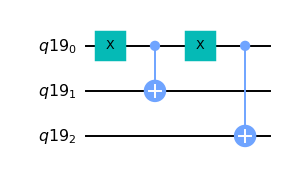

In [10]:
## Interação dos átomos nos caminhos do IMZ
# Se q0 = |0> interage o átomo W (q1)
# Se q0 = |1> interage o átomo Z (q2)
# q0 - caminhos
# q1 - átomo W
# q2 - átomo Z
def qc_AtmInt():
    qr = qiskit.QuantumRegister(3); qc = qiskit.QuantumCircuit(qr, name='PAI') #Photon-Atoms interaction
    qc.x(qr[0]); qc.cx(qr[0], qr[1]); qc.x(qr[0])                   # Interagindo no caminho de cima (átomo W)
    qc.cx(qr[0],qr[2])                                              # Interagindo no caminho de baixo (átomo Z)
    return qc
qc_AtmInt_ = qc_AtmInt(); qc_AtmInt_.draw(output = 'mpl', scale = 0.7)

# Irrealidade dos átomos fora do IMZ

## BBO$_{p}$ - QWP$_{in}$

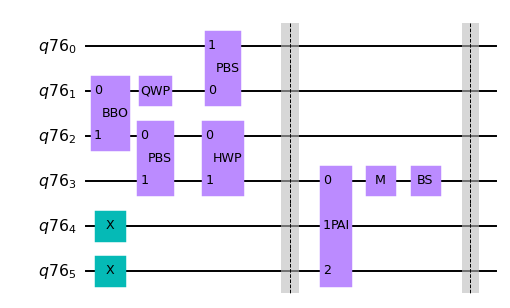

In [17]:
def qc_QCRWZ_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc.barrier()
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    qc.barrier()
    return qc
qc_QCRWZ_in_ = qc_QCRWZ_in(math.pi); qc_QCRWZ_in_.draw(output = 'mpl', scale = 0.7)

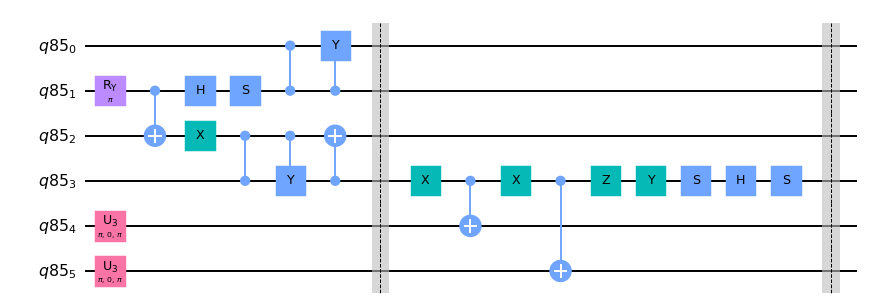

In [18]:
qc_QCRWZ_in_ = qc_QCRWZ_in(math.pi); qc_QCRWZ_in_.decompose().draw(output = 'mpl', scale = 0.7)

In [19]:
qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
qc_QCRWZ_in_ = qc_QCRWZ_in(math.pi); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
qc.decompose().draw('latex_source', filename='./QCR_WZ_in.tex')
!pdflatex QCR_WZ_in.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (MiKTeX 22.12) (preloaded format=pdflatex.fmt)
 restricted \write18 enabled.
entering extended mode
(QCR_WZ_in.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2022-12-17>
(C:\Users\stark\AppData\Local\Programs\MiKTeX\tex/latex/standalone\standalone.c
ls
Document Class: standalone 2022/10/10 v1.3b Class to compile TeX sub-files stan
dalone
(C:\Users\stark\AppData\Local\Programs\MiKTeX\tex/latex/tools\shellesc.sty)
(C:\Users\stark\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifluatex.sty
(C:\Users\stark\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\stark\AppData\Local\Programs\MiKTeX\tex/latex/xkeyval\xkeyval.sty
(C:\Users\stark\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\xkeyval.tex
(C:\Users\stark\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\xkvutils.tex
(C:\Users\stark\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\keyval.tex)))
)
(C:\Users\stark\AppData\Local\Programs\MiKTeX\tex/late